### Seeding the reproducability

In [1]:
# set seeds for reproducibility
import random

random.seed(3)

import numpy as np
np.random.seed(0)

import tensorflow as tf
tf.random.set_seed(0)

### Importing the dependencies

- Keras is a high level API that kind of makes building or training our neural network is much more easily.
- Keras suppport both pytorch and tensorflow

In [2]:
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt

### Data Curation


In [3]:
# Load and prepare the Fashion MNIST dataset
fashion_mnist=datasets.fashion_mnist

# Already splited in X and Y
(train_images, train_labels), (test_images, test_labels)=fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


### Data pre-processing

In [4]:
type(train_images)

numpy.ndarray

In [5]:
type(train_labels)

numpy.ndarray

In [6]:
print(len(train_images))

60000


In [7]:
print(len(train_labels))

60000


Showing the first image
- both are 28*28 pixels.
- grayscale image

In [8]:
print(train_images[0].shape)

(28, 28)


In [10]:
print(train_images[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 23

### Displaying the images

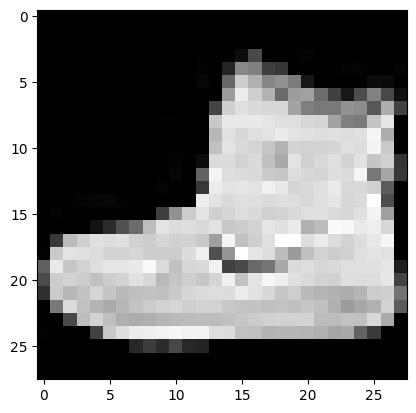

In [12]:
plt.imshow(train_images[0], cmap='gray')
plt.show()

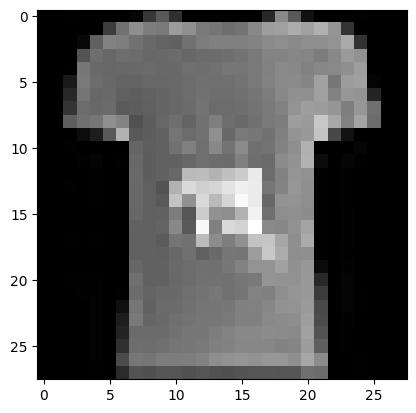

In [14]:
plt.imshow(train_images[180], cmap='gray')
plt.show()

Showing train labels

In [15]:
print(train_labels[0])

9


## class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Data preprocessing

In [16]:
# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

In [17]:
print(train_images[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.00392157 0.    

### Reshape images to specify that it's a single channel (grayscale)

In [18]:
train_images=train_images.reshape((train_images.shape[0], 28,28,1))
test_images=test_images.reshape((test_images.shape[0], 28,28,1))

In [19]:
train_images.shape

(60000, 28, 28, 1)

In [20]:
test_images.shape

(10000, 28, 28, 1)

## Convolutional Neural Network


- **Sequential** means series of connection in this case where we are stacking the layers.
- (3,3) is a kernel that performing some operation in form of a matrix.
- 32 means 32 kernels or features.
- Maxpooling2D is used to reduced spatial Dimentions so we have 2D image. So we need to reduce the image and spatial information present in the image, so that's easier for the model for recognize things from it or recognize it.
- As you can see we started smaller number of kernels and then increased it -- so that our model can understand more complex information.

In [22]:
#Building the convolutional base
model=models.Sequential()

model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(64, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(64, (3,3), activation='relu', input_shape=(28,28,1)))

# Add Dense layers on top
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

**Compile and Training**

In [23]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

**Model training**

In [24]:
history=model.fit(train_images, train_labels,epochs=5, validation_data=(test_images, test_labels))

Epoch 1/5
1875/1875 [==============================] - 12s 4ms/step - loss: 0.4925 - accuracy: 0.8181 - val_loss: 0.3683 - val_accuracy: 0.8644
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3213 - accuracy: 0.8824 - val_loss: 0.3255 - val_accuracy: 0.8836
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2750 - accuracy: 0.8983 - val_loss: 0.3014 - val_accuracy: 0.8917
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2440 - accuracy: 0.9092 - val_loss: 0.2917 - val_accuracy: 0.8982
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2218 - accuracy: 0.9180 - val_loss: 0.2835 - val_accuracy: 0.8993


### Model Evaluation

In [27]:
loss, acc=model.evaluate(test_images, test_labels)

print('\nTest accuracy: ', acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.2835 - accuracy: 0.8993

Test accuracy:  0.8992999792098999


### Visualization

#### a) Loss

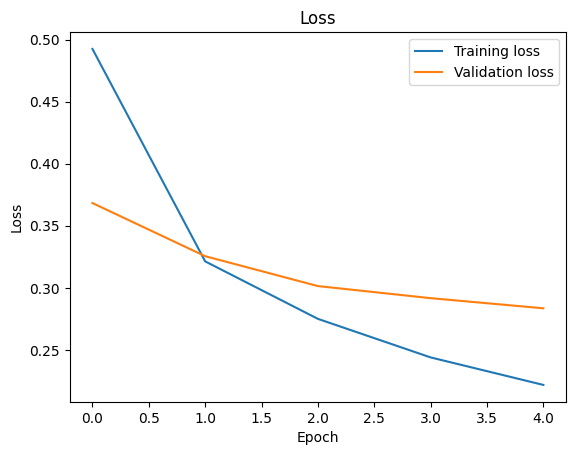

In [34]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')


plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss')
plt.legend()
plt.show()

#### b) accuracy

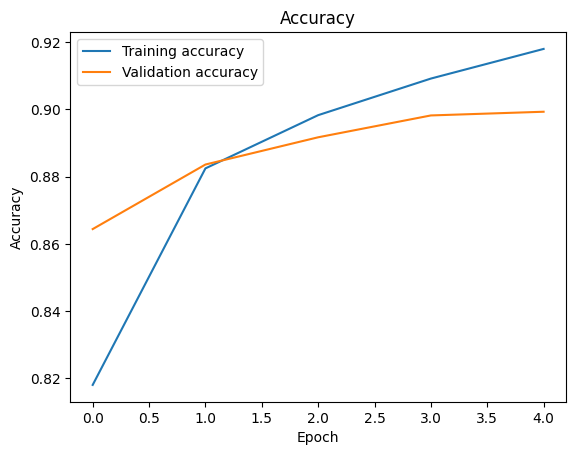

In [35]:
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')


plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy')
plt.legend()
plt.show()

### Saving the Model

In [36]:
model.save('trained_fashion_mnist_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
